## Sean Tomlin  
## Pandas Exam
## Data Science with Python 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)

IMPORTANT NOTE: For ALL transformations you are asked to apply to a data frame, make sure to transform the existing frame if possible instead of creating a new frame!!! You will lose points if you forget! Also, the only problem that might involve using any sort of a loop is problem 19! Using a loop for any other problem will result in loss of all points for that problem!

In [2]:
rawdata = [{'Player':'Bob', 'Team':'Elron', 'Level':46, 'Weapon':'Mini-gun', 'Health':17},
    {'Player':'Janet', 'Team':'Thor', 'Level':39, 'Weapon':'Tazer', 'Health':23, 'Advantage':'Elixir of Life'},
    {'Player':'Tony', 'Team':'Elron', 'Level':23, 'Weapon':'Rocket Launcher', 'Health':26 },
    {'Player':'Wanda', 'Team':'Thor',  'Level':42, 'Weapon':'Flame Thrower', 'Health':20, 'Advantage':'Invisibility'},
    {'Player':'Cindy', 'Team':'Condor', 'Level':36, 'Weapon':'Plasma Rifle', 'Health':28 },
    {'Player':'Ned', 'Team':'Condor',  'Level':40, 'Weapon':'Solar Projector', 'Health':19, 'Advantage':'Stealth'}          
]

Q1: Create a dataframe from the data above using default data frame creation. Set the 'Player' column to be the index of the frame. Print the frame.

In [3]:
pdata = pd.DataFrame(rawdata)
pdata.index = pdata.Player
print(pdata)

             Advantage  Health  Level Player    Team           Weapon
Player                                                               
Bob                NaN      17     46    Bob   Elron         Mini-gun
Janet   Elixir of Life      23     39  Janet    Thor            Tazer
Tony               NaN      26     23   Tony   Elron  Rocket Launcher
Wanda     Invisibility      20     42  Wanda    Thor    Flame Thrower
Cindy              NaN      28     36  Cindy  Condor     Plasma Rifle
Ned            Stealth      19     40    Ned  Condor  Solar Projector


Q2: Change the order of the columns in the frame to be Team, Level, Health, Weapon, Advantage. Print the result.

In [4]:
pdata = pdata[['Team', 'Level', 'Health', 'Weapon', 'Advantage']]
print(pdata)

          Team  Level  Health           Weapon       Advantage
Player                                                        
Bob      Elron     46      17         Mini-gun             NaN
Janet     Thor     39      23            Tazer  Elixir of Life
Tony     Elron     23      26  Rocket Launcher             NaN
Wanda     Thor     42      20    Flame Thrower    Invisibility
Cindy   Condor     36      28     Plasma Rifle             NaN
Ned     Condor     40      19  Solar Projector         Stealth


Q3: Sort the frame in decending order of Health. Print the frame.

In [5]:
pdata = pdata.sort_values(by='Health', ascending = False)
print(pdata)

          Team  Level  Health           Weapon       Advantage
Player                                                        
Cindy   Condor     36      28     Plasma Rifle             NaN
Tony     Elron     23      26  Rocket Launcher             NaN
Janet     Thor     39      23            Tazer  Elixir of Life
Wanda     Thor     42      20    Flame Thrower    Invisibility
Ned     Condor     40      19  Solar Projector         Stealth
Bob      Elron     46      17         Mini-gun             NaN


Q4: Move Tony up 1 level by adding 1. Print the frame.

In [6]:
pdata.loc['Tony','Level'] += 1
print(pdata)

          Team  Level  Health           Weapon       Advantage
Player                                                        
Cindy   Condor     36      28     Plasma Rifle             NaN
Tony     Elron     24      26  Rocket Launcher             NaN
Janet     Thor     39      23            Tazer  Elixir of Life
Wanda     Thor     42      20    Flame Thrower    Invisibility
Ned     Condor     40      19  Solar Projector         Stealth
Bob      Elron     46      17         Mini-gun             NaN


Q5: Increment everyone's health by 2. Print the frame.

In [7]:
pdata['Health'] += 2
print(pdata)

          Team  Level  Health           Weapon       Advantage
Player                                                        
Cindy   Condor     36      30     Plasma Rifle             NaN
Tony     Elron     24      28  Rocket Launcher             NaN
Janet     Thor     39      25            Tazer  Elixir of Life
Wanda     Thor     42      22    Flame Thrower    Invisibility
Ned     Condor     40      21  Solar Projector         Stealth
Bob      Elron     46      19         Mini-gun             NaN


Q6: Add Charlie to the frame. He belongs to the Elron team, is on Level 38, has a health of 29, has a C4 Explosive weapon. Charlie has no advantage so that column should contain the NaN value. Print the frame.

In [8]:
newplayer = pd.DataFrame([{'Team':'Elron', 'Level':38,'Health':29, 'Weapon':'C4 Explosive'}], index=['Charlie'])
pdata = pd.concat([pdata, newplayer], sort = False)
print(pdata)


           Team  Level  Health           Weapon       Advantage
Cindy    Condor     36      30     Plasma Rifle             NaN
Tony      Elron     24      28  Rocket Launcher             NaN
Janet      Thor     39      25            Tazer  Elixir of Life
Wanda      Thor     42      22    Flame Thrower    Invisibility
Ned      Condor     40      21  Solar Projector         Stealth
Bob       Elron     46      19         Mini-gun             NaN
Charlie   Elron     38      29     C4 Explosive             NaN


Q7: Tony is no longer available and must be dropped from the frame. Print the frame.

In [9]:
pdata.drop(['Tony'], inplace = True)
print(pdata)

           Team  Level  Health           Weapon       Advantage
Cindy    Condor     36      30     Plasma Rifle             NaN
Janet      Thor     39      25            Tazer  Elixir of Life
Wanda      Thor     42      22    Flame Thrower    Invisibility
Ned      Condor     40      21  Solar Projector         Stealth
Bob       Elron     46      19         Mini-gun             NaN
Charlie   Elron     38      29     C4 Explosive             NaN


Q8: Print the health and advantage in this order for players from Cindy thru Wanda.

In [10]:
print(pdata.loc['Cindy':'Wanda'][['Health','Advantage']])

       Health       Advantage
Cindy      30             NaN
Janet      25  Elixir of Life
Wanda      22    Invisibility


Q9: Print all player info if they are above level 38 and their health is more than 20.

In [11]:
print(pdata[(pdata['Level']>38) & (pdata['Health']>20) ])

         Team  Level  Health           Weapon       Advantage
Janet    Thor     39      25            Tazer  Elixir of Life
Wanda    Thor     42      22    Flame Thrower    Invisibility
Ned    Condor     40      21  Solar Projector         Stealth


Q10: Replace all NaN values in the Advantage column with the string 'None'. Print the result.

In [12]:
pdata['Advantage'].fillna(value='None',inplace=True)
print(pdata)

           Team  Level  Health           Weapon       Advantage
Cindy    Condor     36      30     Plasma Rifle            None
Janet      Thor     39      25            Tazer  Elixir of Life
Wanda      Thor     42      22    Flame Thrower    Invisibility
Ned      Condor     40      21  Solar Projector         Stealth
Bob       Elron     46      19         Mini-gun            None
Charlie   Elron     38      29     C4 Explosive            None


Q11: Create a function that given a row calculates a score which is the product of the health and level columns plus 100 if the player has an advantage (not 'None'). Create a Score column by applying the function to the frame. Print the frame.

In [13]:
def powerup(player):
    if player['Advantage'] == 'None':
        return 0
    return player['Health']*player['Level'] + 100

pdata['Score'] = pdata.apply(powerup, axis = 1)
print(pdata)

           Team  Level  Health           Weapon       Advantage  Score
Cindy    Condor     36      30     Plasma Rifle            None      0
Janet      Thor     39      25            Tazer  Elixir of Life   1075
Wanda      Thor     42      22    Flame Thrower    Invisibility   1024
Ned      Condor     40      21  Solar Projector         Stealth    940
Bob       Elron     46      19         Mini-gun            None      0
Charlie   Elron     38      29     C4 Explosive            None      0


Q12: Create a dataframe from the planets.csv file. The first column should be used as the index. The frame should only contain the index and the method, number, and year columns from the file. Print the head of the dataframe.

In [14]:
planets = pd.read_csv("planets.csv", index_col = 0, usecols = ['Unnamed: 0','method','number','year'])
print(planets.head())

            method  number  year
0  Radial Velocity       1  2006
1  Radial Velocity       1  2008
2  Radial Velocity       1  2011
3  Radial Velocity       1  2007
4  Radial Velocity       1  2009


Q13: Add a column to the dataframe which represents the decade within which the year occurred. Use vectorized operations to do this. When finished, the resulting column should be of type string with all values ending with an 's'. Print the head of the frame.

In [15]:
planets['decade'] = ((planets['year']/10).apply(np.floor)*10).astype(int).astype(str) + 's'
print(planets.head())

            method  number  year decade
0  Radial Velocity       1  2006  2000s
1  Radial Velocity       1  2008  2000s
2  Radial Velocity       1  2011  2010s
3  Radial Velocity       1  2007  2000s
4  Radial Velocity       1  2009  2000s


Q14: Using groupby along with stacking or unstacking, create a dataframe which for each method shows the number of planets discovered in each decade. The methods are the row index and the decades are the columns. Fill all NaNs with zeros. Print the entire frame.

In [16]:
planetCount = planets.groupby(['method','decade']).count()
planetCount.drop('year',axis=1, inplace = True)
planetCount = planetCount.unstack()
planetCount.fillna(value=0, inplace=True)
print(planetCount)

                              number                    
decade                         1980s 1990s  2000s  2010s
method                                                  
Astrometry                       0.0   0.0    0.0    2.0
Eclipse Timing Variations        0.0   0.0    3.0    6.0
Imaging                          0.0   0.0   20.0   18.0
Microlensing                     0.0   0.0   10.0   13.0
Orbital Brightness Modulation    0.0   0.0    0.0    3.0
Pulsar Timing                    0.0   3.0    1.0    1.0
Pulsation Timing Variations      0.0   0.0    1.0    0.0
Radial Velocity                  1.0  28.0  309.0  215.0
Transit                          0.0   0.0   62.0  335.0
Transit Timing Variations        0.0   0.0    0.0    4.0


Q15: Create a dataframe from the titanic.csv file. Use column 0 as the index. The frame should only contain data for the survived, sex, fare, and class columns. From this dataframe, create a pivot table that shows the average fares for males and females in each class, and the number of surviving males and females in each class. The row index should be the class values. Use margins to include averages for all males, females, and all passengers in each class. Print the entire frame.

In [17]:
titanic = pd.read_csv("titanic.csv", index_col = 0, usecols=['Unnamed: 0','survived','sex','fare','class'])

ptable = pd.pivot_table(titanic, columns='sex', values=['fare','survived'], index = 'class', margins=True, 
                       aggfunc={'survived':sum, 'fare':'mean'}) 
print(ptable)

              fare                       survived          
sex         female       male        All   female male  All
class                                                      
First   106.125798  67.226127  84.154687       91   45  136
Second   21.970121  19.741782  20.662183       70   17   87
Third    16.118810  12.661633  13.675550       72   47  119
All      44.479818  25.523893  32.204208      233  109  342


Q16: Create a bar plot that shows the survival percentage of males and females and all passengers on a per class basis. Use data from the pivot table in the previous problem. The width of the bars should be .25. The plot should look similar to the one shown below. 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

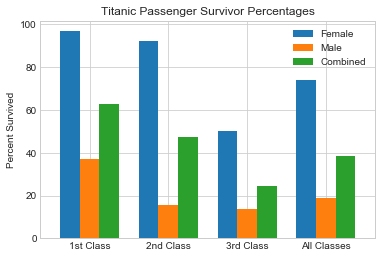

In [18]:
totals = titanic.groupby(['class','sex'])['sex'].count()
classTotals = titanic.groupby(['class'])['sex'].count()

maleT = titanic['sex'][titanic['sex'] == 'male'].size
femaleT = titanic['sex'][titanic['sex'] == 'female'].size
allT = titanic['sex'].size

surv = ptable.loc[:,'survived'].copy()    #make a copy of the dataframe -- avoids SettingWithCopy Warning
surv['female%'] = surv.loc[:,'female'] / totals.loc[:,'female']
surv.loc[:,'male%'] = surv.loc[:,'male'] / totals.loc[:,'male']
surv.loc[:,'All%'] = surv.loc[:,'All'] / classTotals
surv.loc['All','female%'] = surv.loc['All','female'] / femaleT
surv.loc['All','male%'] = surv.loc['All','male'] / maleT
surv.loc['All','All%'] = surv.loc['All','All'] / allT

percentSurvived = surv.loc[:,['female%', 'male%','All%']]
percentSurvived *=100
percentSurvived.columns = ['Female','Male','Combined']
percentSurvived.index = ['1st Class','2nd Class','3rd Class', 'All Classes']

# sets bar width to .75, so now each bar has three containers with length 0.25
ax = percentSurvived.plot(kind='bar', title='Titanic Passenger Survivor Percentages', width=.75)
ax.set_ylabel('Percent Survived')
plt.xticks(rotation = 0)


Q17: Read in the ColumbusPrecipData.csv file. This file contains hourly precipitation amounts in Columbus covering a 14 year period. The first column is a date and time. The second column is measured precipitation in inches. Create the dataframe such that it has a datetime index created from column 0. Using resample over a quarterly period, create a plot that shows the quarterly precipitation total amounts over the 14 year period. The plot should appear similar to the one shown below.

(120, 176)

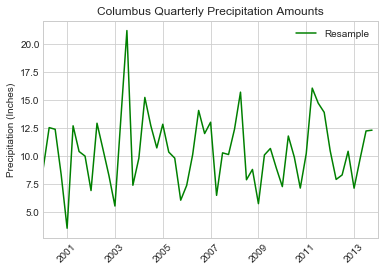

In [19]:
cbusRain = pd.read_csv("ColumbusPrecipData.csv", index_col = 0, parse_dates = True, infer_datetime_format = True)

quarterly = pd.DataFrame()
quarterly['Resample'] = cbusRain['Precip'].resample('Q').sum()
ax1 = quarterly.plot(title='Columbus Quarterly Precipitation Amounts', color='g')
ax1.set_ylabel('Precipitation (Inches)')
plt.xticks(rotation = 45)
ax1.set_xlim('2000', '2014')

Q18: Create a plot showing the average monthly precipitation and the monthly standard deviation. Plot both values on the same axes. The plot should look similar to the one below.

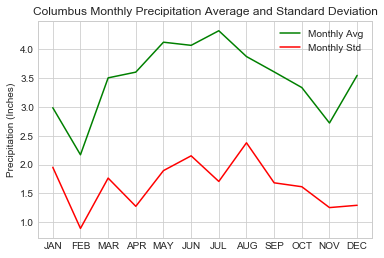

In [20]:
monthly = pd.DataFrame()
monthly['Monthly Avg'] = cbusRain['Precip'].resample('M').sum()
monthlyRain = pd.DataFrame()
monthlyRain['Monthly Avg'] = monthly.groupby(monthly.index.month)['Monthly Avg'].mean()
monthlyRain['Monthly Std'] = monthly.groupby(monthly.index.month)['Monthly Avg'].std()

axes = plt.subplot()
axes.set_title('Columbus Monthly Precipitation Average and Standard Deviation')
monthLabels= ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
axes.plot(monthLabels, monthlyRain['Monthly Avg'],  color='g')
axes.plot(monthLabels, monthlyRain['Monthly Std'], color='red')
axes.set_ylabel("Precipitation (Inches)")
axes.legend(loc='best')

Q19: Create a dataframe that contains the number of days Columbus had precipitation for each month of each year covered by the original data frame. This will involve resampling, groupby, and a custom function. The final result should be a data frame with the row index being the years and the column index being the months.

In [21]:
dailyRain = cbusRain.resample('1d').sum()
B = dailyRain.groupby([dailyRain.index.year,dailyRain.index.month]).sum()
raindays = dailyRain['Precip'][dailyRain.Precip != 0]
C = raindays.groupby([raindays.index.year,raindays.index.month]).count()
raindayCount = pd.DataFrame(C)
raindayCount.index.rename(('year','month'), inplace=True)
raindayCount.columns = ['Rain Day Count']
raindayCount1 = raindayCount.unstack()
print(raindayCount1)

      Rain Day Count                                            
month             1   2   3   4   5   6   7   8   9   10  11  12
year                                                            
2000              17  14   8  10  13  10   7  12  13   5  13  17
2001              10  10   9  11  17  13  11  10   7   8   9  12
2002              10   9  12  16  17  11   6   7   7  10   9  14
2003              15  17  13   9  19  12  16  13  12   8  12  14
2004              14   8  17  15  21  14  15   9   6  11  17  13
2005              16  12  12  14  12   9  13  11   7  10  14  16
2006              14   8  14  13  16  11  13  10  12  13  10   9
2007              18  10  13  14   8   9   9  10   5  10  10  14
2008              14  16  13  13  16  16   7   7   8   6   7  17
2009              15   6   7  13   9   9  11  10  13  13   8  14
2010              16  13  11   7  16  14   9   7   7  10   9  12
2011              13  11  12  19  16  15  10   7  18  12  10  16
2012              17  11 

Q20: Plot the result from the previous question. The plot should show the min, max, and average precipitation days per month on the same axes and should look similar to the plot shown below.

Text(0,0.5,'Precipitation Days Per Month')

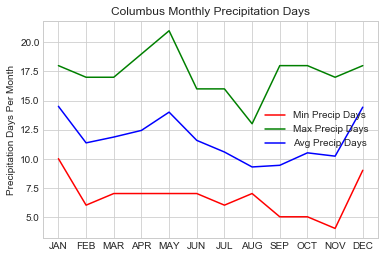

In [22]:
raindayCount.reset_index(inplace=True)
mindays = raindayCount.groupby(raindayCount['month'])['Rain Day Count'].min()
maxdays = raindayCount.groupby(raindayCount['month'])['Rain Day Count'].max()
avgdays = raindayCount.groupby(raindayCount['month'])['Rain Day Count'].mean()

monthLabels= ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

axes = plt.subplot()
axes.plot(monthLabels, mindays, label='Min Precip Days', color='red')
axes.plot(monthLabels, maxdays, label='Max Precip Days', color='green')
axes.plot(monthLabels, avgdays, label='Avg Precip Days', color='blue')
axes.legend(loc='best')
axes.set_title('Columbus Monthly Precipitation Days')
axes.set_ylabel('Precipitation Days Per Month')